In [0]:
import cv2
import numpy as np

In [2]:
import os
os.getcwd()

'/content'

In [3]:
from google.colab import files

uploaded = files.upload()

Saving test_image.jpg!d to test_image.jpg!d


In [4]:
os.listdir()

['.config', 'test_image.jpg!d', 'sample_data']

In [0]:
img = cv2.imread('test_image.jpg!d')

In [6]:
img.shape

(800, 1200, 3)

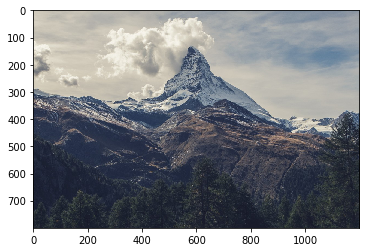

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
img=pltimg.imread('test_image.jpg!d')
imgplot = plt.imshow(img)
plt.show()

In [8]:
img[:,:,2].shape

(800, 1200)

In [9]:
copy_image = img.copy()
channel_one = copy_image[:,:,0]
channel_one.shape

(800, 1200)

In [10]:
channel_one[799][1119]

32

In [12]:
def transform(img,k=2):
    
  # make a copy of the image
    copy_image = img.copy()

  # transforming the image of channel one (1)
    channel_one = copy_image[:,:,0]
    channel_two = copy_image[:,:,1]
    channel_three = copy_image[:,:,2]

    new_channel_one = np.zeros((1600,2400))
    new_channel_two = np.zeros((1600,2400))
    new_channel_three = np.zeros((1600,2400))
    for m,c in enumerate(channel_one):
        for n,b in enumerate(c):
            i,j = 0,0
            i,j = m*k, n*k
            new_channel_one[i][j] = b # a22
            new_channel_one[i-1][j-1] = b #a11
            new_channel_one[i-1][j] = b #a12
            new_channel_one[i][j-1] = b #a21
    print('done')
  
    for m,c in enumerate(channel_two):
         for n,b in enumerate(c):
            i,j = 0,0
            i,j = m*k, n*k
            new_channel_two[i][j] = b # a22
            new_channel_two[i-1][j-1] = b #a11
            new_channel_two[i-1][j] = b #a12
            new_channel_two[i][j-1] = b #a21
    print('done')

    for m,c in enumerate(channel_three):
         for n,b in enumerate(c):
            i,j = 0,0
            i,j = m*k, n*k
            new_channel_three[i][j] = b # a22
            new_channel_three[i-1][j-1] = b #a11
            new_channel_three[i-1][j] = b #a12
            new_channel_three[i][j-1] = b #a21
    print('done')
    return new_channel_one, new_channel_two, new_channel_three

c1, c2, c3 = transform(img, k=2)

done
done
done


In [13]:
c1.shape,c2.shape, c3.shape

((1600, 2400), (1600, 2400), (1600, 2400))

In [15]:
def merge_array(c1, c2,c3):
    array = []
    array.append([c1])
    array.append([c2])
    array.append([c3])
    return np.array(array)

output_image = merge_array(c1, c2, c3)
output_image = output_image.reshape(1600,2400,3)
output_image.shape

(1600, 2400, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


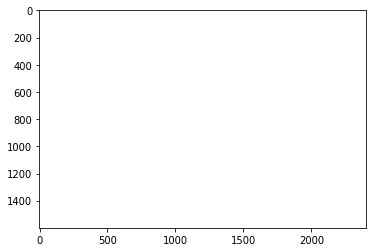

In [18]:
import matplotlib.pyplot as plt
plt.imshow(output_image)